# Project Background

## 1. Goal
- This project aims to develop a predictive model to forecast the electricity output (CF) of a wind farm based on wind speed data from various locations. The model's performance will be evaluated using the Mean Absolute Error (MAE) metric.
- The primary goal is to build a forecast model that accurately predicts the electricity output (CF) using historical wind speed data.


## 2. Data Source


# Data Schema Review

### Dataset
- **Train Sheet**: Historical data for training the model.
  - Column B – "CF": Target variable (electricity output).
  - Columns C to DJ: Wind speed data from different locations.
- **Predict Sheet**: Data for prediction.

- **112 features**???

### Data information
- **Missing Value**: 0
- **Duplicated Value**: 0
- **Data Type**: numerical variables, ???datetime???

# EDA
## Univariate Analysis
- Numerical Variable Distribution

- Categorical Variable Cardinality

## Bivariate analysis
- Numerical analysis - Correlation
- Categorical analysis



----

# Data Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ensure matplotlib inline for Jupyter Notebooks
%matplotlib inline

In [2]:
from scipy.stats import shapiro, normaltest, skew, kurtosis, pearsonr, spearmanr
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import statsmodels.formula.api as smf

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from IPython.display import display, Image
from pdf2image import convert_from_path

from sklearn.model_selection import train_test_split

from autogluon.tabular import TabularPredictor

In [4]:
data = pd.read_excel('Wind_data.xlsx', sheet_name='Train')
predict = pd.read_excel('Wind_data.xlsx', sheet_name='Predict')
data.head()

,DATETIME,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,WS_1366338,WS_1366351,WS_1369320,WS_1461024,WS_1481513,WS_1504146,WS_1513782,WS_1513805,WS_1571308,WS_1574484,WS_1625339,WS_1625374,WS_1628663,WS_1681085,WS_1820276,WS_1820279,WS_1899876,WS_1911282,WS_1937650,WS_1937653,WS_1953863,WS_1960535,WS_2113254,WS_2113394,WS_2118117,WS_2217107,WS_2379547,WS_2385763,WS_2455069,WS_2460378,WS_2467589,WS_2467635,WS_2479335,WS_2479342,WS_2479346,WS_2503597,WS_2508545,WS_2508550,WS_2586062,WS_593968,WS_594133,WS_609612,WS_629008,WS_629020,WS_631992,WS_651000,WS_676278,WS_676403,WS_676534,WS_72720,WS_72721,WS_72733,WS_73450,WS_73451,WS_73494,WS_73822,WS_74020,WS_74022,WS_74124,WS_74158,WS_74180,WS_74243,WS_745977,WS_746023,WS_74719,WS_74884,WS_751132,WS_75213,WS_75287,WS_75812,WS_75931,WS_75932,WS_75933,WS_75934,WS_75935,WS_75936,WS_75955,WS_76003,WS_76004,WS_76275,WS_76434,WS_76888,WS_77067,WS_77080,WS_77363,WS_77370,WS_77682,WS_77683,WS_77720,WS_77740,WS_77985,WS_78026,WS_78205,WS_78207,WS_78208,WS_811655,WS_839753,WS_875373,WS_883683,WS_883699,WS_914573,WS_918665,WS_920775,WS_921049
0,2019-08-07 00:00:00,0.652524,10.35,8.99,4.57,9.69,8.90,2.90,5.74,1.16,8.81,8.74,11.14,6.13,15.46,10.70,9.66,9.72,11.02,9.90,6.79,2.13,7.31,2.09,6.60,8.17,2.33,3.47,8.04,5.71,9.95,10.27,6.41,6.96,5.75,11.13,10.57,10.45,8.99,9.82,5.84,11.90,6.61,5.71,6.58,11.75,11.55,11.92,6.83,8.89,8.34,10.89,10.59,10.71,11.31,10.27,7.52,6.73,10.52,9.96,9.96,10.94,10.56,9.17,11.67,10.67,10.05,11.78,10.71,10.29,8.32,10.47,11.69,10.88,10.32,9.19,8.80,10.44,11.03,10.24,9.96,9.77,11.00,11.16,11.26,11.55,9.10,9.76,10.44,10.58,11.14,11.13,10.85,10.74,11.06,10.10,9.77,9.93,7.07,10.24,8.72,10.73,10.77,9.82,11.12,6.79,9.31,11.63,10.72,10.55,11.41,10.77,10.17,9.24
1,2019-08-07 01:00:00,0.605852,9.70,8.28,5.78,9.10,7.98,2.23,3.46,0.97,7.75,7.88,10.49,5.84,14.90,10.33,9.59,9.64,9.73,9.48,6.43,1.47,6.96,1.44,6.12,7.42,2.25,2.66,7.70,5.53,10.33,9.60,5.82,6.35,5.63,11.29,10.23,10.72,8.92,9.21,5.35,11.25,6.18,5.58,6.14,11.67,11.73,11.99,6.29,7.95,7.96,10.25,9.98,10.04,11.45,10.33,6.92,5.58,9.79,10.74,9.92,11.03,10.64,8.67,11.65,10.88,9.43,11.75,10.04,9.63,7.65,10.69,11.03,10.99,9.65,9.02,7.95,10.35,11.07,9.51,10.74,9.77,11.11,11.42,11.53,11.73,8.13,9.05,9.82,10.77,10.49,11.15,10.22,10.62,11.35,9.96,9.77,9.97,6.65,9.51,7.76,10.39,10.12,9.21,10.47,6.40,9.50,11.10,11.02,9.91,11.16,10.98,10.16,9.09
2,2019-08-07 02:00:00,0.564094,9.04,7.39,6.21,8.98,7.78,1.98,2.62,0.92,7.55,7.70,10.12,5.81,14.22,10.01,9.59,9.63,8.92,9.11,5.99,1.23,7.09,1.21,5.92,6.91,2.30,2.64,7.30,5.25,10.64,8.90,5.60,6.00,5.62,11.36,9.92,10.22,9.01,8.40,5.09,10.86,5.99,5.58,5.96,11.37,11.73,11.90,6.03,7.81,7.55,9.76,9.69,9.58,11.45,10.35,6.72,5.26,9.28,10.71,9.91,11.04,10.67,8.30,11.49,10.99,8.69,11.59,9.58,8.98,7.20,10.78,10.60,11.02,9.00,8.95,7.61,10.16,11.01,9.26,10.71,9.78,11.14,11.54,11.62,11.73,7.90,8.16,9.25,10.85,10.12,11.06,9.78,10.37,11.47,9.75,9.78,9.99,6.43,9.26,7.64,9.93,9.61,8.40,10.10,6.23,9.46,10.74,11.19,9.52,11.00,11.10,10.04,9.04
3,2019-08-07 03:00:00,0.532721,8.78,7.49,6.43,8.84,7.82,1.33,2.43,0.68,7.53,7.77,9.65,5.32,13.53,9.99,9.44,9.47,8.60,8.82,5.86,1.39,6.86,1.37,5.56,6.84,1.79,3.09,7.24,5.23,10.72,8.70,5.86,5.82,5.66,11.38,9.90,10.49,9.35,8.24,4.85,10.76,5.88,5.62,5.87,11.25,11.74,11.84,5.91,7.85,7.50,9.36,9.32,9.22,11.44,10.32,6.88,4.61,9.18,9.84,9.78,11.00,10.63,8.16,11.37,11.07,8.47,11.46,9.22,8.75,6.84,10.87,10.50,10.99,8.76,8.81,7.65,10.01,10.93,9.04,9.84,9.71,11.12,11.60,11.68,11.74,7.92,8.16,8.91,10.93,9.65,10.96,9.41,10.19,11.55,9.60,9.71,9.97,6.22,9.04,7.70,9.57,9.22,8.24,9.67,6.01,9.45,10.65,11.27,9.11,10.93,11.18,10.20,8.89
4,2019-08-07 04:00:00,0.495608,8.23,6.88,6.81,8.52,6.65,1.64,2.45,0.59,6.40,6.60,9.21,5.25,12.84,9.31,9.20,9.22,7.19,8.63,5.22,1.69,5.90,1.66,4.85,6.61,1.90,3.40,7.21,5.29,10.46,8.13,5.61,5.69,5.60,10.98,9.25,10.62,9.18,7.61,4.48,9.94,5.81,5.55,5.80,10.77,11.22,11.35,5.82,6.63,7.43,8.85,8.99,8.96,10.99,10.03,6.64,3.97,8.34,

In [5]:
predict.head()

,DATETIME,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,WS_1366338,WS_1366351,WS_1369320,WS_1461024,WS_1481513,WS_1504146,WS_1513782,WS_1513805,WS_1571308,WS_1574484,WS_1625339,WS_1625374,WS_1628663,WS_1681085,WS_1820276,WS_1820279,WS_1899876,WS_1911282,WS_1937650,WS_1937653,WS_1953863,WS_1960535,WS_2113254,WS_2113394,WS_2118117,WS_2217107,WS_2379547,WS_2385763,WS_2455069,WS_2460378,WS_2467589,WS_2467635,WS_2479335,WS_2479342,WS_2479346,WS_2503597,WS_2508545,WS_2508550,WS_2586062,WS_593968,WS_594133,WS_609612,WS_629008,WS_629020,WS_631992,WS_651000,WS_676278,WS_676403,WS_676534,WS_72720,WS_72721,WS_72733,WS_73450,WS_73451,WS_73494,WS_73822,WS_74020,WS_74022,WS_74124,WS_74158,WS_74180,WS_74243,WS_745977,WS_746023,WS_74719,WS_74884,WS_751132,WS_75213,WS_75287,WS_75812,WS_75931,WS_75932,WS_75933,WS_75934,WS_75935,WS_75936,WS_75955,WS_76003,WS_76004,WS_76275,WS_76434,WS_76888,WS_77067,WS_77080,WS_77363,WS_77370,WS_77682,WS_77683,WS_77720,WS_77740,WS_77985,WS_78026,WS_78205,WS_78207,WS_78208,WS_811655,WS_839753,WS_875373,WS_883683,WS_883699,WS_914573,WS_918665,WS_920775,WS_921049
0,2020-01-09 00:00:00,NaN,1.69,1.88,3.15,0.92,2.27,1.14,1.24,2.98,2.53,2.18,1.55,1.59,1.10,2.09,1.44,1.43,1.23,1.51,1.15,1.22,2.29,1.24,1.09,0.83,2.78,2.28,1.42,1.77,10.07,2.01,2.50,3.04,3.20,1.38,2.08,9.10,1.16,1.98,1.60,1.44,3.25,3.18,3.18,0.83,1.18,1.08,3.20,2.40,1.27,1.68,0.98,0.93,1.34,1.31,1.90,1.28,1.99,1.44,1.39,1.42,1.35,1.02,1.31,1.08,1.52,1.28,0.93,2.13,1.54,0.97,1.61,1.38,2.09,1.47,2.08,1.50,1.47,0.77,1.44,1.35,1.41,1.24,1.16,1.18,2.40,1.95,1.44,1.05,1.55,1.45,1.19,1.39,1.17,1.47,1.35,1.31,1.35,0.77,2.38,1.94,1.95,1.98,1.40,1.27,1.27,1.43,1.28,1.91,1.12,1.15,1.35,1.46
1,2020-01-09 01:00:00,NaN,1.60,2.02,3.91,0.44,2.36,1.15,1.63,2.83,2.84,2.20,1.17,1.66,1.28,2.43,1.38,1.37,1.95,1.49,1.65,1.46,2.33,1.49,1.10,1.19,2.79,2.45,1.03,1.37,9.97,2.04,1.72,4.72,4.62,1.60,2.46,8.29,1.03,2.13,3.25,2.14,4.95,4.60,4.88,1.11,1.24,0.92,4.97,2.58,0.89,1.41,0.83,1.04,1.47,1.37,1.26,1.22,3.38,1.37,1.38,1.52,1.45,0.80,1.07,1.21,1.42,1.01,1.04,2.15,1.68,1.06,2.43,1.50,2.10,1.27,2.08,1.31,1.47,0.79,1.37,1.32,1.54,1.53,1.37,1.24,2.57,2.10,1.22,1.16,1.17,1.39,0.86,1.11,1.46,1.29,1.32,1.31,1.13,0.79,2.67,1.71,1.85,2.13,1.02,1.11,1.43,2.04,1.60,1.57,1.03,1.28,1.49,1.29
2,2020-01-09 02:00:00,NaN,1.79,2.14,4.20,0.65,2.06,1.28,2.36,3.07,2.34,1.94,1.55,1.82,1.29,3.49,1.64,1.60,2.94,1.68,1.92,1.31,2.05,1.28,0.90,0.80,2.04,3.24,0.81,1.00,9.79,2.17,1.37,5.27,5.17,1.71,3.62,7.65,0.91,2.22,3.64,3.28,5.60,5.14,5.68,0.97,1.26,0.86,5.64,2.14,0.79,1.69,1.03,1.39,1.52,1.62,1.04,1.31,4.59,1.61,1.59,1.60,1.63,0.85,1.14,1.50,1.62,1.11,1.39,2.26,1.64,1.35,3.63,1.62,2.22,1.54,2.03,1.35,1.48,0.88,1.61,1.65,1.63,1.65,1.42,1.26,2.17,2.20,1.49,1.45,1.33,1.40,1.18,1.31,1.57,1.34,1.65,1.63,1.43,0.88,2.19,1.93,1.99,2.22,1.39,1.42,1.42,2.91,1.81,1.85,1.10,1.56,1.54,1.56
3,2020-01-09 03:00:00,NaN,2.01,2.32,5.17,0.51,2.31,0.83,3.39,3.38,2.53,2.26,1.73,1.72,1.04,2.77,2.27,2.19,3.73,1.78,2.39,1.63,2.11,1.61,0.82,1.12,3.18,3.37,0.89,0.91,9.72,2.47,1.52,5.47,4.98,2.19,2.91,6.99,0.78,1.80,3.59,2.99,5.54,4.97,5.59,1.05,1.60,1.19,5.71,2.48,0.86,1.91,1.18,1.51,1.94,2.27,1.11,1.50,4.72,2.23,2.18,2.10,2.23,0.89,1.54,2.06,1.79,1.48,1.51,2.59,1.78,1.88,3.50,2.14,2.54,2.16,2.17,1.77,1.93,1.03,2.23,2.36,2.12,2.00,1.73,1.61,2.37,2.43,1.66,2.07,1.73,1.85,1.31,1.59,1.87,1.73,2.36,2.39,1.81,1.03,2.52,2.21,2.31,1.80,1.55,2.01,1.26,2.49,2.09,2.09,1.06,2.12,1.66,2.18
4,2020-01-09 04:00:00,NaN,2.12,2.54,4.19,0.77,4.52,0.97,2.89,3.79,4.21,4.46,1.58,2.23,1.08,1.83,2.69,2.60,2.15,1.94,3.08,1.90,4.61,1.88,1.10,1.36,3.21,4.67,0.89,0.92,9.26,2.49,1.13,6.49,5.18,2.45,1.78,5.59,1.24,2.59,4.49,1.40,6.07,5.18,6.09,0.89,1.81,1.39,6.35,4.43,0.85,1.98,1.28,1.63,2.22,2.66,0.92,1.52,2.64,2.64,2.59,2.46,2.62,0.91,1.81,2.29,1.97,1.73,1.63,2.56,2.01,2.13,1.63,2.51,2.53,2.58,4.52,2.15,2.32,1.16,2.64,2.78,2.45,2.17,1.91,1.81,4.58,2.58,1.81,2.36,1.58,2.22,1.43,1.86,2.03,2.11,2.78,2.80,2.17,1.16,4.

In [6]:
data.shape

(3635, 114)

In [7]:
predict.shape

(93, 114)

### No Missing Value

In [8]:
sum(data.isnull().any())

0

### No Duplicated values

In [9]:
data.duplicated().value_counts()

False    3635
Name: count, dtype: int64

# Exploratory Data Analysis

In [10]:
# Make sure the data is sorted by datetime
data.set_index('DATETIME', inplace=True)

# Get all columns of Wind Speed from different locations
ws_columns = [col for col in data.columns if col.startswith('WS_')]

# EDA
## Univariate Analysis
- Numerical Variable Distribution

In [11]:
# Determine Distribution
def determine_distribution(df):
    results = []
    for column in df.columns:
        data = df[column]
        
        # Calculate max, min, mean, std
        max_val = data.max()
        min_val = data.min()
        mean_val = data.mean()
        std_val = data.std()
        median_val = data.median()
        
        # Normality tests
        stat, p_value_normal = shapiro(data)
        stat_k2, p_value_k2 = normaltest(data)
        
        # Skewness and kurtosis
        skewness = skew(data)
        kurt = kurtosis(data)
        
        # Determine distribution type
        if p_value_normal > 0.05 and p_value_k2 > 0.05:
            dist_type = 'Normal Distribution'
        elif np.abs(skewness) < 0.5:
            dist_type = 'Uniform Distribution'
        else:
            dist_type = 'Skewed Distribution'
        
        results.append({
            'Column': column,
            'Min': min_val,
            'Median': median_val,
            'Max': max_val,
            'Mean': mean_val,
            'Std': std_val,
            'Distribution Type': dist_type

        })
    
    return pd.DataFrame(results)

In [12]:
distribution_results = determine_distribution(data.drop('CF', axis=1))
distribution_results

,Column,Min,Median,Max,Mean,Std,Distribution Type
0,WS_1133733,0.59,3.66,14.66,4.532563,2.790853,Skewed Distribution
1,WS_1156770,0.49,3.22,13.13,3.943094,2.371923,Skewed Distribution
2,WS_1156968,0.68,4.78,14.64,5.124113,2.712505,Skewed Distribution
3,WS_1182195,0.46,4.49,23.04,5.118909,3.213767,Skewed Distribution
4,WS_1193865,0.53,5.36,17.43,5.558190,2.691479,Uniform Distribution
5,WS_1321569,0.50,2.01,13.20,2.524281,1.655931,Skewed Distribution
6,WS_1324653,0.31,3.34,11.81,3.927272,2.398751,Skewed Distribution
7,WS_1358699,0.24,2.46,19.15,3.388721,2.834749,Skewed Distribution
8,WS_1366338,0.57,5.63,17.09,5.787298,2.834219,Uniform Distribution
9,WS_1366351,0.51,5.23,17.37,5.400131,2.608748,Uniform Distribution


In [13]:
distribution_results_df = distribution_results['Distribution Type'].value_counts().reset_index()
distribution_results_df

,Distribution Type,count
0,Skewed Distribution,93
1,Uniform Distribution,19


There are 93 features follow Skewed Distribution, 19 features follow Uniform Distribution.	

### 93, 19. So? 没有outlier、近似正态

In [14]:
column_Skewed = distribution_results[distribution_results['Distribution Type'] == 'Skewed Distribution']['Column']
column_Uniform = distribution_results[distribution_results['Distribution Type'] == 'Uniform Distribution']['Column']

In [15]:
def plot_histograms(df, batch_size=10):
    num_columns = len(df.columns)
    for start in range(0, num_columns, batch_size):
        end = min(start + batch_size, num_columns)
        columns_batch = df.columns[start:end]
        df[columns_batch].hist(figsize=(15, 10), bins=20)
        plt.tight_layout()
        plt.show()

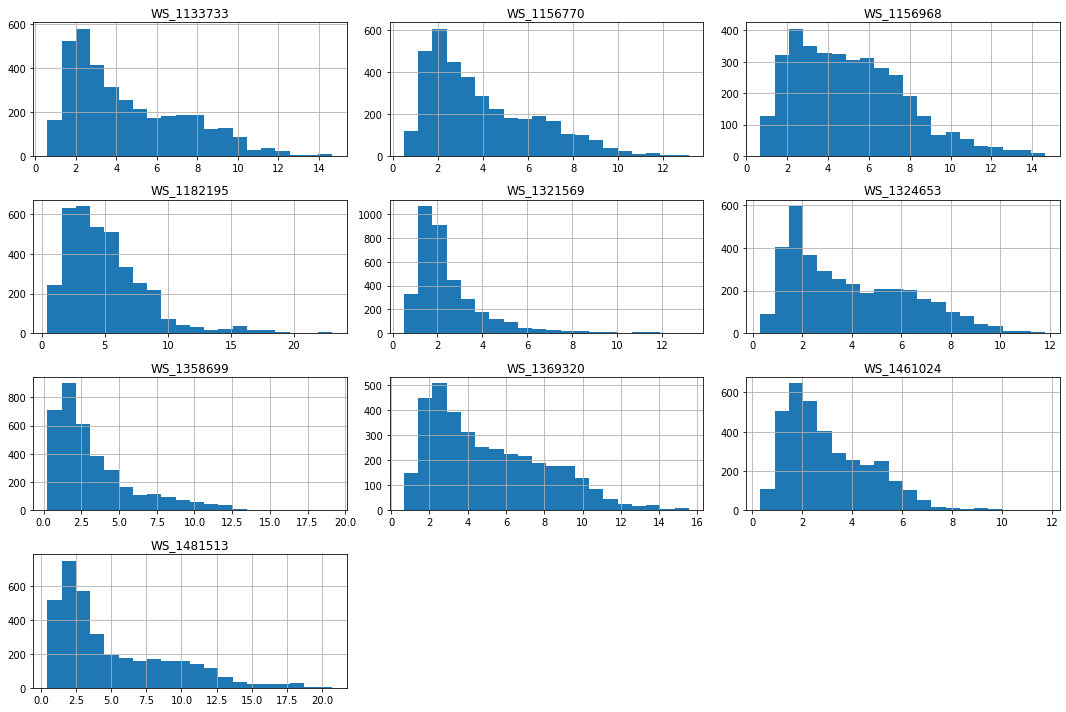

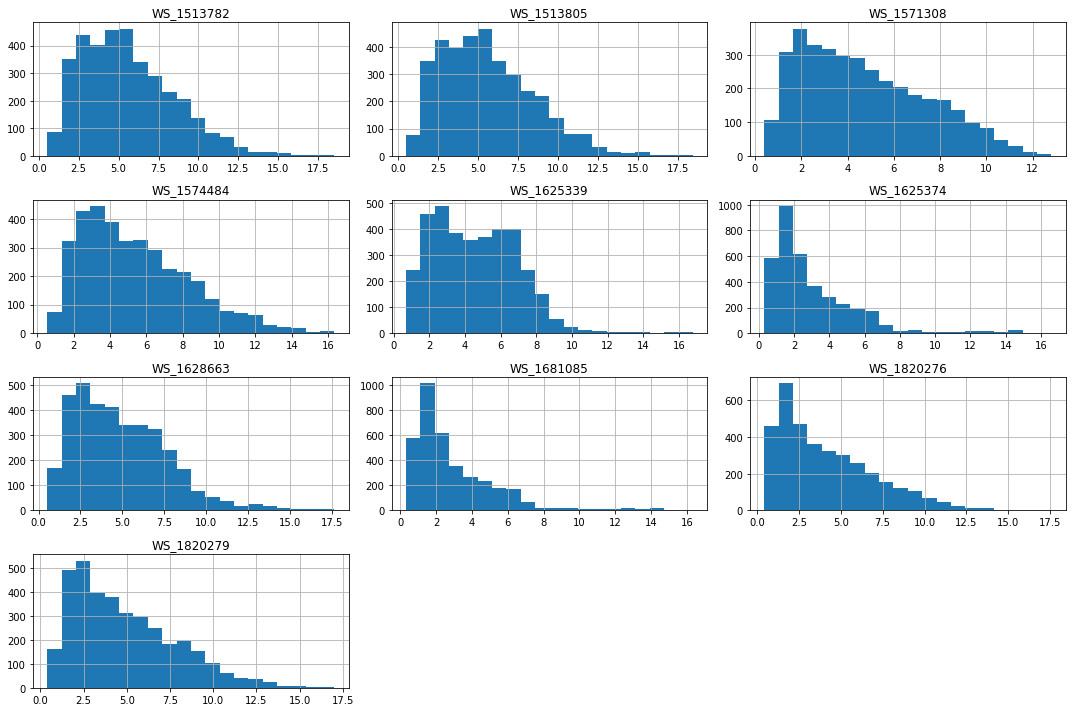

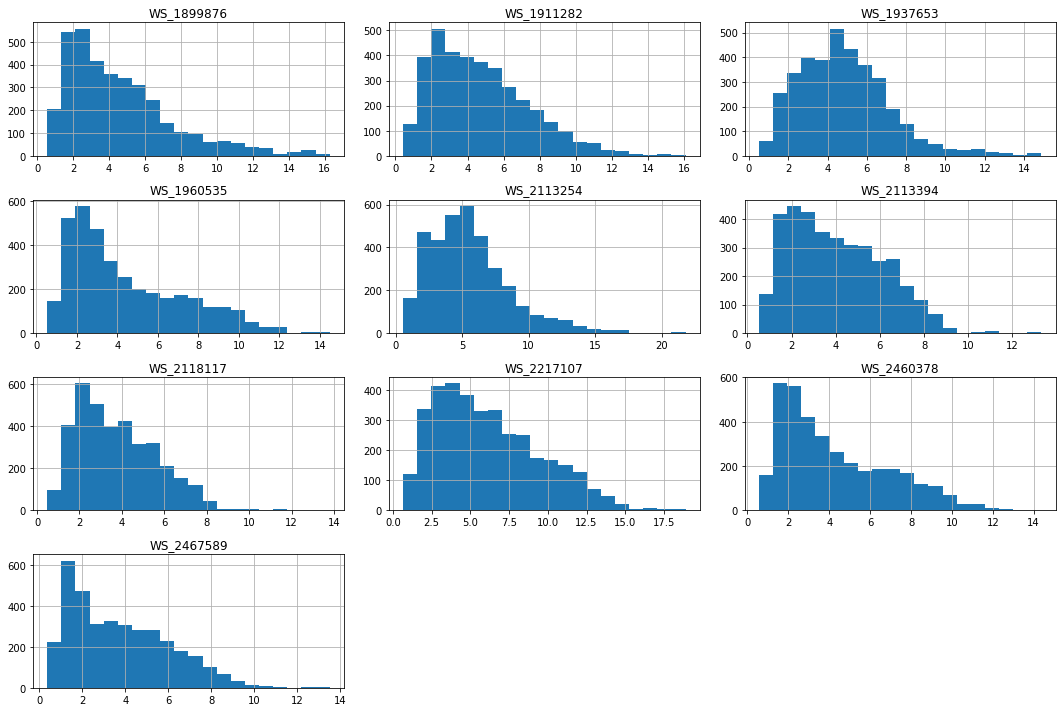

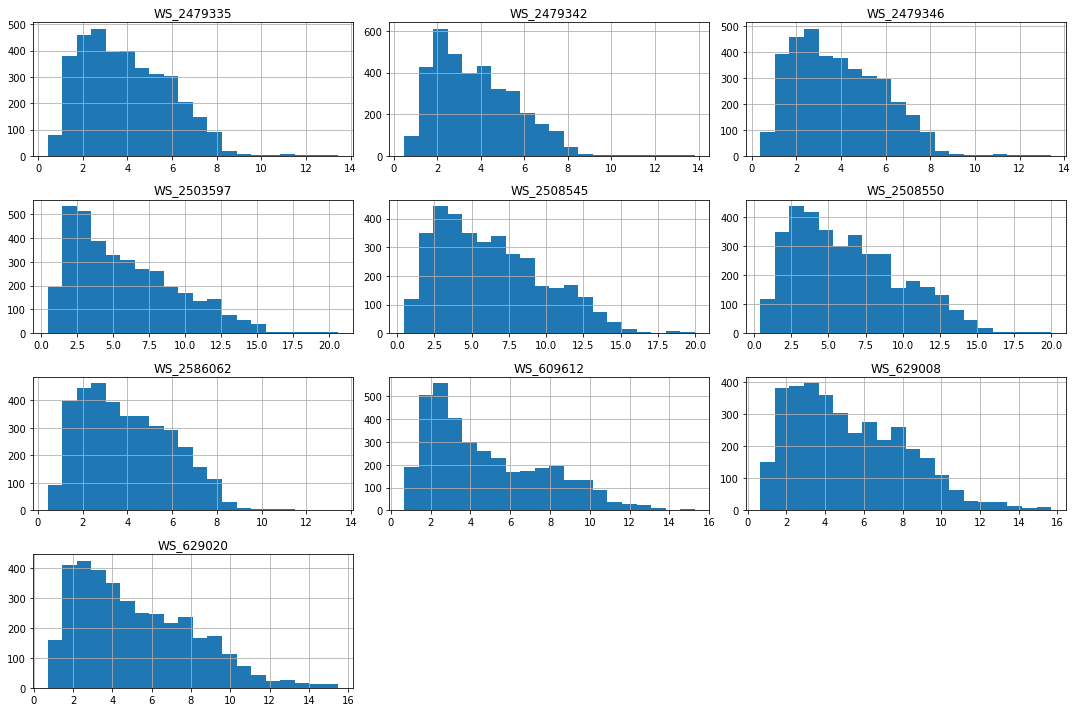

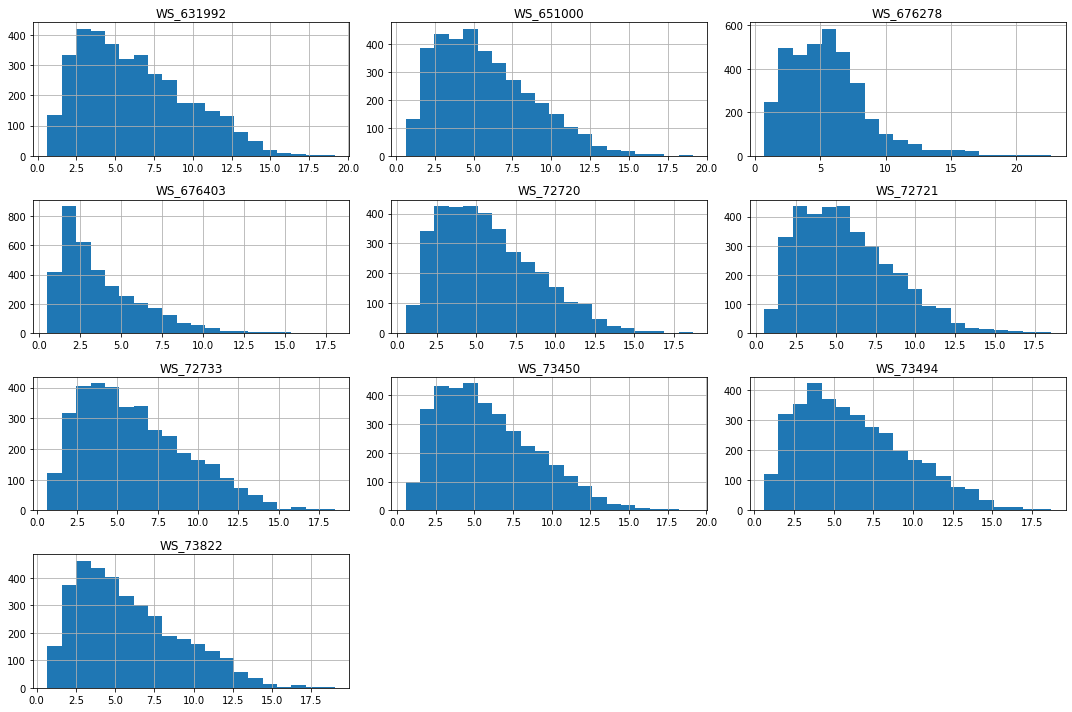

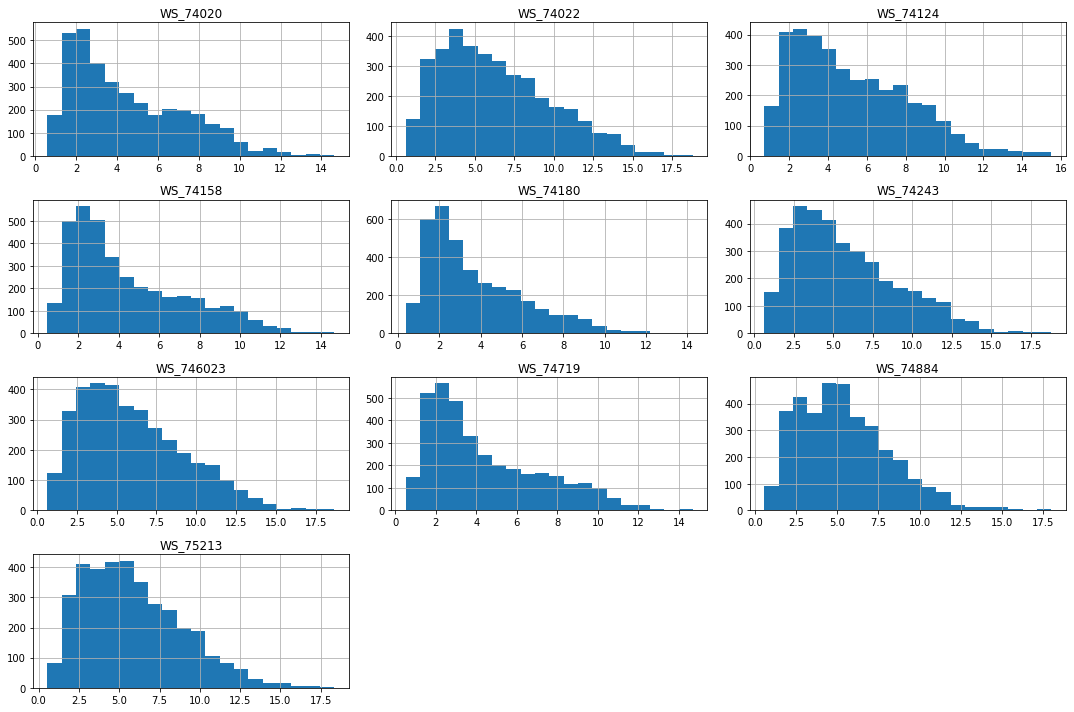

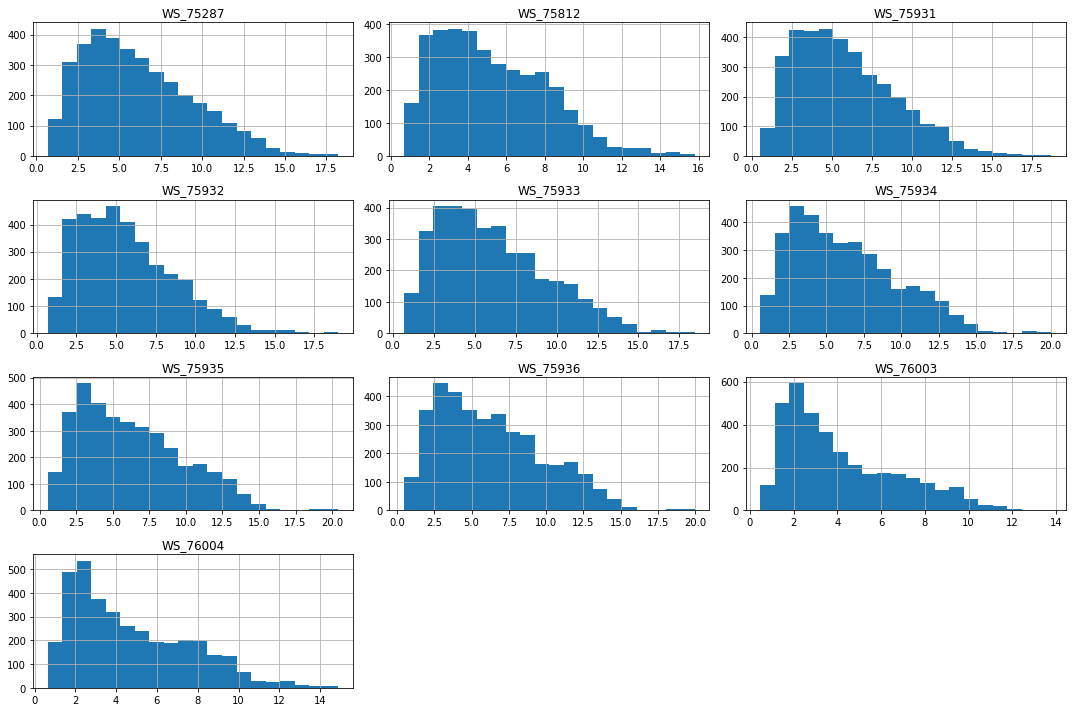

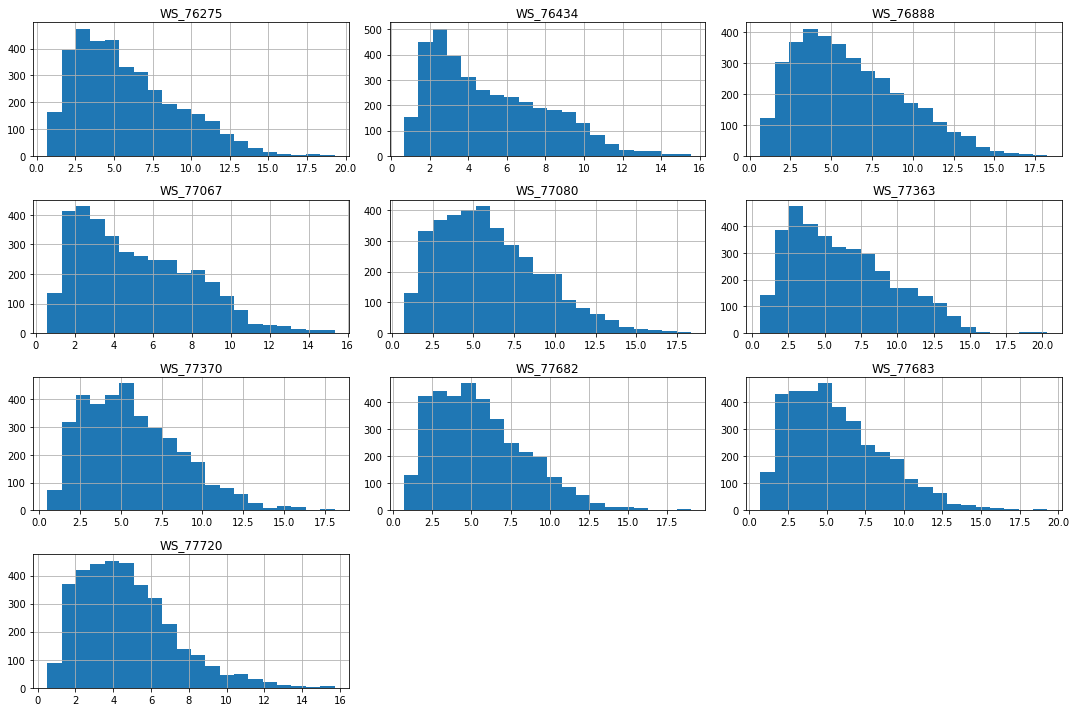

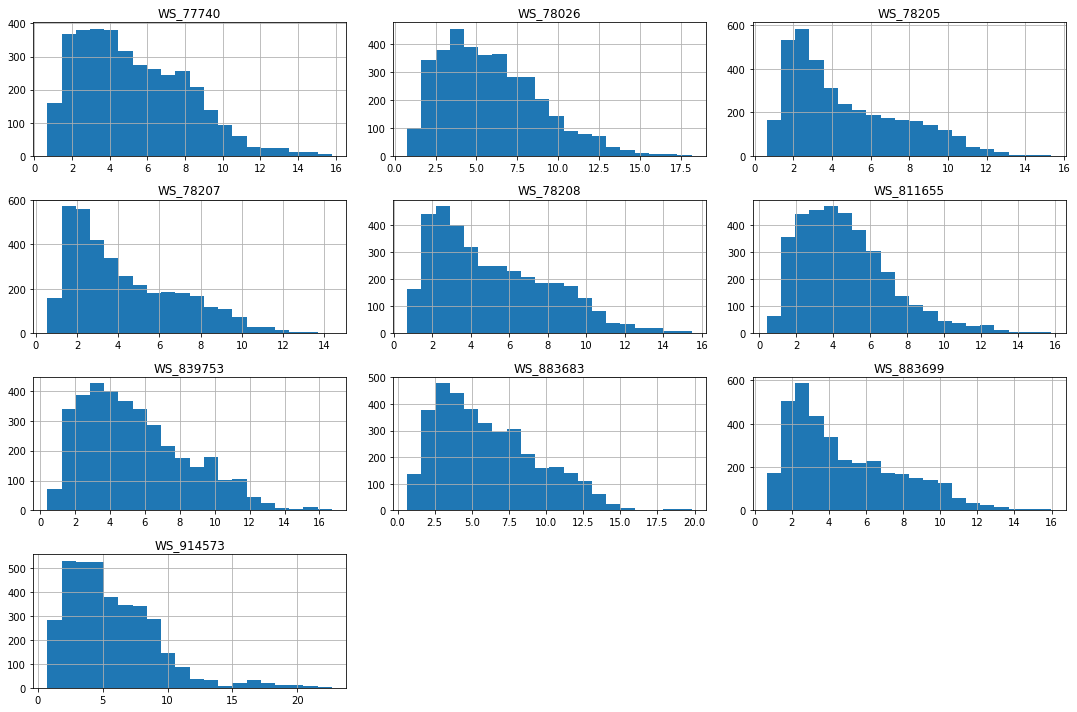

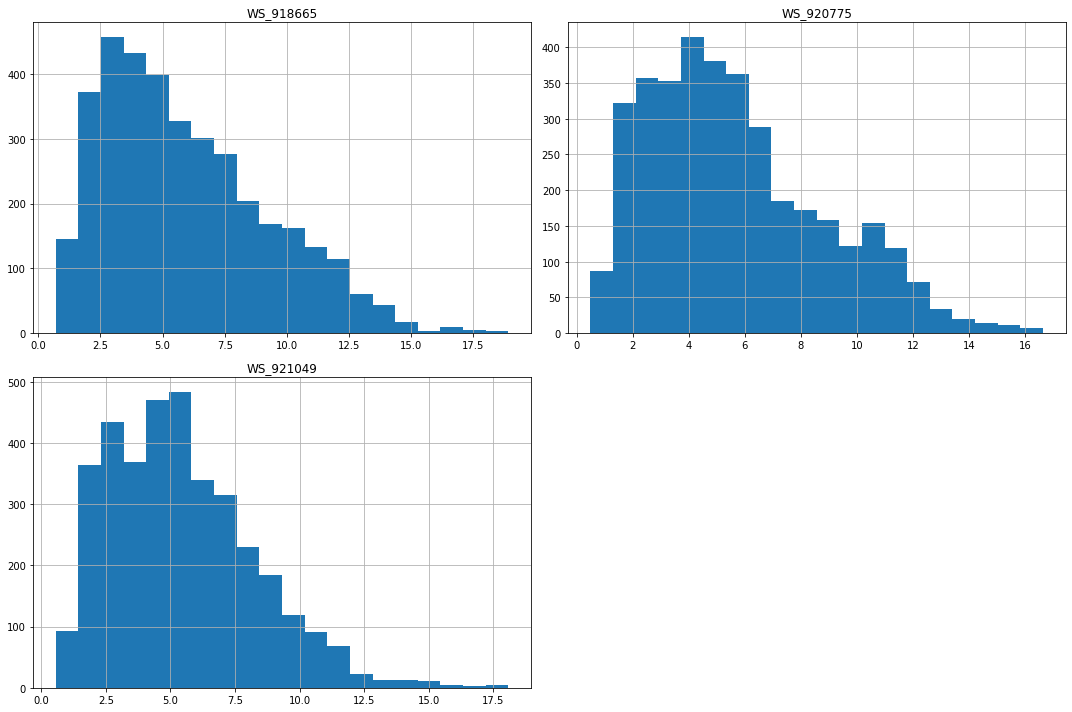

In [16]:
# Plot histograms for features that follow Skewed Distribution.
plot_histograms(data[column_Skewed], batch_size=10)

Above are histograms of features that follow Skewed Distribution.

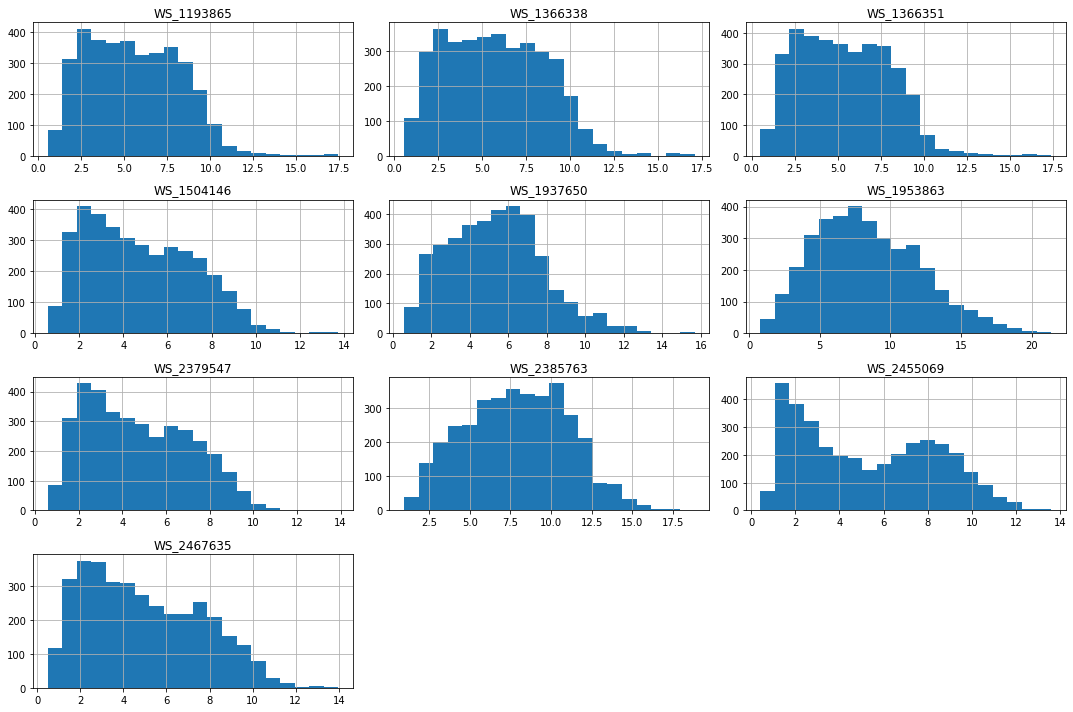

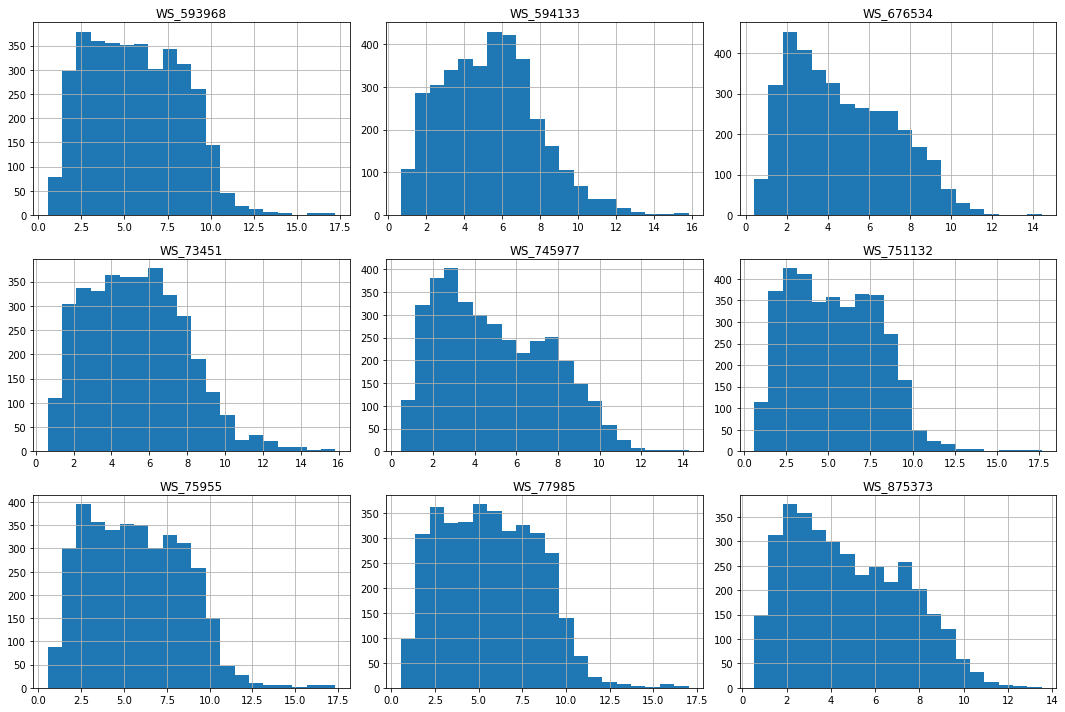

In [17]:
# Plot histograms for features that follow Uniform Distribution.
plot_histograms(data[column_Uniform], batch_size=10)

Above are histograms of features that follow Uniform Distribution.

现在看每一行的distribution：

In [18]:
row_distribution_results = determine_distribution(data.drop('CF', axis=1).T)
row_distribution_results['Distribution Type'].value_counts().reset_index()

,Distribution Type,count
0,Skewed Distribution,2077
1,Uniform Distribution,1432
2,Normal Distribution,126


As we can see, most features follow Skewed Distribution and Uniform Distribution, some features follow Normal Distribution.

So I use用min, 5th, 25th，median, 75th, 95th, max, mean, std???

In [19]:
data['MIN_WS'] = data[ws_columns].min(axis=1)
data['MEDIAN_WS'] = data[ws_columns].median(axis=1)
data['P5_WS'] = data[ws_columns].apply(lambda row: np.percentile(row, 5), axis=1)
data['P25_WS'] = data[ws_columns].apply(lambda row: np.percentile(row, 25), axis=1)
data['P75_WS'] = data[ws_columns].apply(lambda row: np.percentile(row, 75), axis=1)
data['P95_WS'] = data[ws_columns].apply(lambda row: np.percentile(row, 95), axis=1)
data['MAX_WS'] = data[ws_columns].max(axis=1)
data['MEAN_WS'] = data[ws_columns].mean(axis=1)
data['STD_WS'] = data[ws_columns].std(axis=1)

1. Mean and Median Proximity:

    The mean and median of the features are quite close, indicating a symmetrical distribution of data without significant skewness.

2. Reasonable Range for Min and Max Values:

    Both the minimum and maximum values of the features fall within reasonable ranges, suggesting the absence of outliers in the data.

3. Comparable Standard Deviations:

    The standard deviations of the features are similar in magnitude, indicating a consistent level of variability across different features.

4. Distribution Characteristics:

    From the histograms and numerical summaries of the distributions, it was observed that the wind speed values in most locations are approximately normally distributed.
    In a few locations, the wind speed distribution appears to be nearly uniform.

针对raw data的发现：
1. mean和median较为接近
2. min和max都处于合理的区域之间，所以我assume没有outlier（不用boxplot的原因：看不出distribution，我认为用histgram可以更好的结合。。。）
2. 标准差（量级接近）都差不多
3. 结合数值和上面distribution的图表，我们发现大部分location的wind speed的数值分布都近似approximately normal distribution；小部分地区的WS分布近似均匀分布


针对aggregate data的结论：
。。。（和上面差不多

# EDA
## Univariate Analysis
- Numerical Variable Distribution
- Categorical Variable Cardinality

In [20]:
def get_new_features(data):
    
    # Get information from datetime to help generate seasons etc.
    data['YEAR'] = data.index.year
    data['MONTH'] = data.index.month
    data['DAY'] = data.index.day
    data['HOUR'] = data.index.hour

    # Define seasons
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Fall'

#     data['SEASON'] = data['MONTH'].apply(get_season)

    # Define daylight and night based on hour (assuming 6 AM to 6 PM is daylight)
    def get_daylight_night(hour):
        if 6 <= hour < 18:
            return 'Daylight'
        else:
            return 'Night'

#     data['DAY_NIGHT'] = data['HOUR'].apply(get_daylight_night)
    
    # Define parts of the day
    def get_day_part(hour):
        if 0 <= hour < 6:
            return 'Morning'
        elif 6 <= hour < 12:
            return 'Midday'
        elif 12 <= hour < 18:
            return 'Afternoon'
        else:
            return 'Night'

#     data['DAY_PART'] = data['HOUR'].apply(get_day_part)
    
    # Define weekay and weekend
#     data["IS_WEEKEND"] = data.index.weekday
    mapping1 = {
        0: 'Weekday',
        1: 'Weekday',
        2: 'Weekday',
        3: 'Weekday',
        4: 'Weekday',
        5: 'Weekend',
        6: 'Weekend',
    }
#     data['IS_WEEKEND'] = data['IS_WEEKEND'].apply(lambda x: mapping[x])
    
    
#     data['day_of_week'] = data.index.weekday
    mapping2 = {
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
    }

#     data['day_of_week'] = data['day_of_week'].apply(lambda x: mapping[x])
    
    
    
    data['SEASON'] = data['MONTH'].apply(get_season)
    data['DAY_NIGHT'] = data['HOUR'].apply(get_daylight_night)
    data['DAY_PART'] = data['HOUR'].apply(get_day_part)
    data["IS_WEEKEND"] = data.index.weekday
    data['IS_WEEKEND'] = data['IS_WEEKEND'].apply(lambda x: mapping1[x])
    data['day_of_week'] = data.index.weekday
    data['day_of_week'] = data['day_of_week'].apply(lambda x: mapping2[x])
    
    return data

In [21]:
# Generate new features, get new dataset
data = get_new_features(data)

Now I'm going to analyze categorical variable cardinality

In [22]:
def get_proportion(feature):
    # Calculate the proportion of the feature
    counts = feature.value_counts(normalize=True)

    # Convert the proportion to percentages
    percentages = counts * 100
    return percentages.reset_index()

In [23]:
# Calculate the proportion of each season
get_proportion(data['SEASON'])

,SEASON,proportion
0,Fall,59.477304
1,Winter,24.594223
2,Summer,15.928473


这个数据更代表fall和winter，所以猜想model的prediction很有可能在温度低时不准确

可以挖掘一个feature：fall+winter为一个低温，summer为高温

注意：：：得检查test当中有无春

In [24]:
# Calculate the proportion of each day
get_proportion(data['DAY_NIGHT'])

,DAY_NIGHT,proportion
0,Daylight,50.261348
1,Night,49.738652


This demonstrates that the data is evenly distributed between day and night.

这证明了白天-黑夜的数据是均匀的

In [25]:
# Calculate the proportion of each day (4 parts)
get_proportion(data['DAY_PART'])

,DAY_PART,proportion
0,Afternoon,25.199450
1,Midday,25.061898
2,Night,24.951857
3,Morning,24.786795


This further demonstrates that the data for parts of a day is evenly distributed.

In [26]:
# Calculate the proportion of each week
get_proportion(data['IS_WEEKEND'])

,IS_WEEKEND,proportion
0,Weekday,72.13205
1,Weekend,27.86795


It was found that 72.13% of the data corresponds to weekdays, while 27.87% corresponds to weekends. Therefore, it can be concluded that the time series data provided is continuous, with no interruptions in the middle.



In [27]:
# Calculate the proportion of each week
get_proportion(data['day_of_week'])

,day_of_week,proportion
0,Friday,14.497937
1,Wednesday,14.470426
2,Tuesday,14.470426
3,Thursday,14.387895
4,Monday,14.305365
5,Saturday,14.030261
6,Sunday,13.837689


This demonstrates that the data is evenly dimstributed among week.

In [28]:
# Calculate the proportion of each month
get_proportion(data['MONTH'])

,MONTH,proportion
0,12,20.412655
1,10,19.889959
2,9,19.807428
3,11,19.779917
4,8,15.928473
5,1,4.181568


This demonstrates that the data is evenly distributed among month.

<AxesSubplot:xlabel='count', ylabel='day_of_week'>

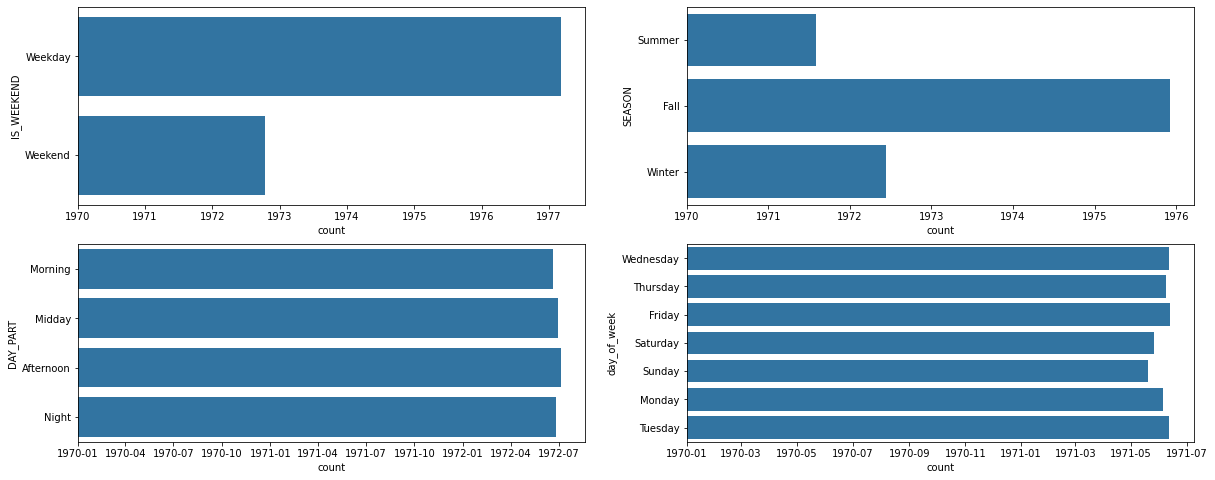

In [29]:
fig=plt.figure(figsize=(20,8))
fig.add_subplot(2,2,1)
sns.countplot(data['IS_WEEKEND']) #countplot是单变量分析；barplot需要输入两个变量
fig.add_subplot(2,2,2)
sns.countplot(data['SEASON'])
fig.add_subplot(2,2,3)
# sns.countplot(data['DAY_NIGHT'])
sns.countplot(data['DAY_PART'])
fig.add_subplot(2,2,4)
sns.countplot(data['day_of_week'])

Univariate Analysis Summary:
???

# EDA
## Univariate Analysis
- Numerical Variable Distribution
- Categorical Variable Cardinality

## Bivariate analysis
- Numerical analysis - Correlation

In [30]:
# Prepare Features and Target
ws_sts_columns = [col for col in data.columns if 'WS' in col]
X = data[ws_sts_columns]
y = data['CF']

# Initialize lists to store the results
pearson_results = []
spearman_results = []

# Compute Pearson and Spearman correlations
for column in X.columns:
    if pd.api.types.is_numeric_dtype(X[column]):
        pearson_corr, _ = pearsonr(X[column], y)
        spearman_corr, _ = spearmanr(X[column], y)
        pearson_results.append({'WS_location': column, 'Pearson Correlation': pearson_corr})
        spearman_results.append({'WS_location': column, 'Spearman Correlation': spearman_corr})

# Convert the results to DataFrames
pearson_df = pd.DataFrame(pearson_results).sort_values(by='Pearson Correlation', ascending=False)
spearman_df = pd.DataFrame(spearman_results).sort_values(by='Spearman Correlation', ascending=False)

pearson_spearman = pd.merge(pearson_df, spearman_df, on='WS_location')

In [31]:
pearson_spearman

,WS_location,Pearson Correlation,Spearman Correlation
0,MEAN_WS,0.867128,0.884486
1,WS_2503597,0.848757,0.827564
2,P75_WS,0.845775,0.878471
3,MEDIAN_WS,0.842367,0.851489
4,WS_2508550,0.841939,0.840181
5,WS_2508545,0.840002,0.841517
6,WS_75936,0.839991,0.841491
7,WS_75935,0.837190,0.839795
8,WS_75934,0.834120,0.837020
9,WS_77363,0.833789,0.836939


# EDA
## Univariate Analysis
- Numerical Variable Distribution
- Categorical Variable Cardinality

## Bivariate analysis
- Numerical analysis - Correlation
- Categorical analysis

ANOVA Test

In [32]:
from scipy.stats import f_oneway, ttest_ind

class1= data[data['SEASON']=='Summer']['CF']
class2= data[data['SEASON']=='Fall']['CF']
class3= data[data['SEASON']=='Winter']['CF']


# Conduct the one-way ANOVA
# no significant difference  ????????
print('This is the ANOVA-test result of feature SEASON:\n',f_oneway(class1, class2, class3))

This is the ANOVA-test result of feature SEASON:
 F_onewayResult(statistic=83.08876803021315, pvalue=5.202013210703249e-36)


显著

In [33]:
class1= data[data['day_of_week']=='Monday']['CF']
class2= data[data['day_of_week']=='Tuesday']['CF']
class3= data[data['day_of_week']=='Wednesday']['CF']
class4= data[data['day_of_week']=='Thursday']['CF']
class5= data[data['day_of_week']=='Friday']['CF']
class6= data[data['day_of_week']=='Saturday']['CF']
class7= data[data['day_of_week']=='Sunday']['CF']


# Conduct the one-way ANOVA
# no significant difference 
print('This is the ANOVA-test result of feature day_of_week:\n',f_oneway(class1, class2, class3, class4, class5, class6, class7))

This is the ANOVA-test result of feature day_of_week:
 F_onewayResult(statistic=8.217475502611896, pvalue=7.45666768797419e-09)


显著

In [34]:
class1= data[data['DAY_PART']=='Morning']['CF']
class2= data[data['DAY_PART']=='Midday']['CF']
class3= data[data['DAY_PART']=='Afternoon']['CF']
class4= data[data['DAY_PART']=='Night']['CF']


# Conduct the one-way ANOVA
# no significant difference 
print('This is the ANOVA-test result of feature DAY_PART:\n',f_oneway(class1, class2, class3, class4))

This is the ANOVA-test result of feature DAY_PART:
 F_onewayResult(statistic=68.68120772570627, pvalue=3.393868596506757e-43)


显著

T-test

In [35]:
class1= data[data['DAY_NIGHT']=='Night']['CF']
class2= data[data['DAY_NIGHT']=='Daylight']['CF']


# Conduct the one-way ANOVA ???????????
# no significant difference 
print('This is the T-test result of feature DAY_NIGHT:\n',ttest_ind(class1, class2))

This is the T-test result of feature DAY_NIGHT:
 Ttest_indResult(statistic=13.82232140933804, pvalue=2.172226869557305e-42)


显著

In [36]:
class1= data[data['IS_WEEKEND']=='Weekday']['CF']
class2= data[data['IS_WEEKEND']=='Weekend']['CF']


# Conduct the one-way ANOVA
# no significant difference 
print('This is the T-test result of feature IS_WEEKEND:\n',ttest_ind(class1, class2))

This is the T-test result of feature IS_WEEKEND:
 Ttest_indResult(statistic=1.3132394681703519, pvalue=0.1891852034969178)


不显著，说明周末和工作日没什么区别

<AxesSubplot:xlabel='day_of_week', ylabel='CF'>

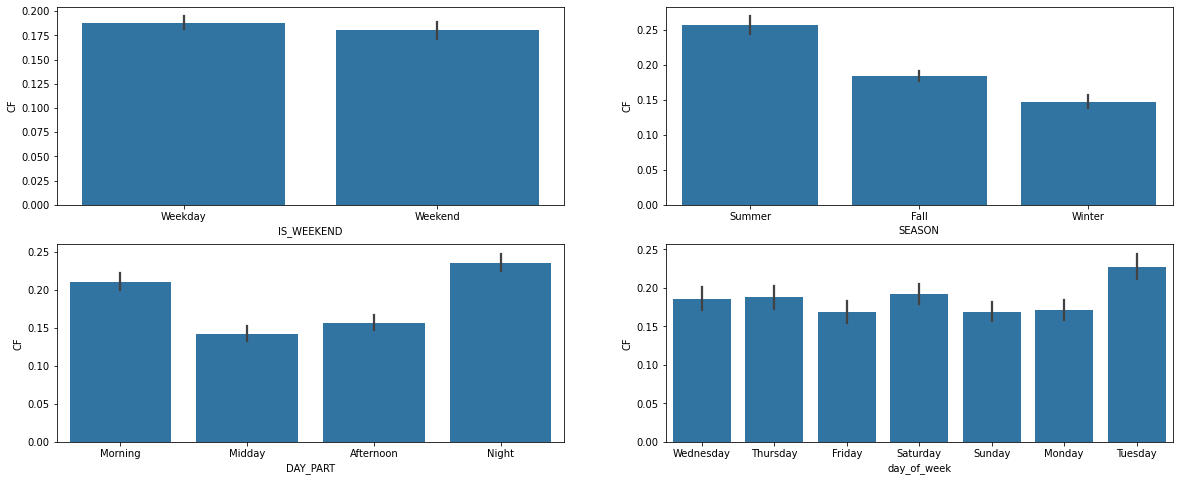

In [37]:
fig=plt.figure(figsize=(20,8))
fig.add_subplot(2,2,1)
sns.barplot(data, x='IS_WEEKEND', y='CF') #countplot是单变量分析；barplot需要输入两个变量
fig.add_subplot(2,2,2)
sns.barplot(data, x='SEASON', y='CF')
fig.add_subplot(2,2,3)
# sns.barplot(data, x='DAY_NIGHT', y='CF')
sns.barplot(data, x='DAY_PART', y='CF')
fig.add_subplot(2,2,4)
sns.barplot(data, x='day_of_week', y='CF')

。。。可以明显得出XX的平均值的不同（利用每个图的特点挖掘数据的信息）

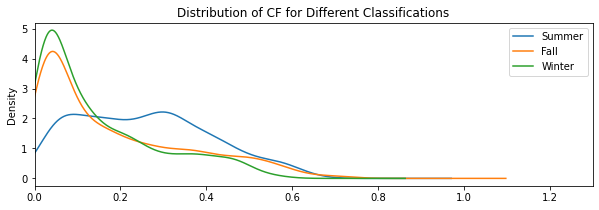

In [38]:
cols_to_vis = ['CF']
classifications_to_vis = ['Summer', 'Fall', 'Winter']

for col in cols_to_vis:
    plt.figure(figsize=(10, 3)) 
    for classification in classifications_to_vis:
        # Plot the density for the current classification group
        data[data['SEASON'] == classification][col].plot(kind='density', label=classification)
    
    plt.xlim(0, 1.3)
    plt.legend()
    plt.title(f'Distribution of {col} for Different Classifications')
    plt.show()

。。。上面的barplot只能看数值，这个distribution能看出summer和fall、winter完全不一样

所以证实了之前的猜测：可以创造一个新的feature为：温度。【面试时可以解释：也有别的气候因素可以成为feature。。。】

(可视化+test)从这两个角度出发，决定feature engineering的方向。。。

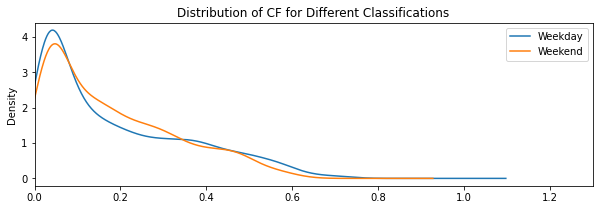

In [39]:
cols_to_vis = ['CF']
classifications_to_vis = ['Weekday', 'Weekend']

for col in cols_to_vis:
    plt.figure(figsize=(10, 3)) 
    for classification in classifications_to_vis:
        # Plot the density for the current classification group
        data[data['IS_WEEKEND'] == classification][col].plot(kind='density', label=classification)
    
    plt.xlim(0, 1.3)
    plt.legend()
    plt.title(f'Distribution of {col} for Different Classifications')
    plt.show()

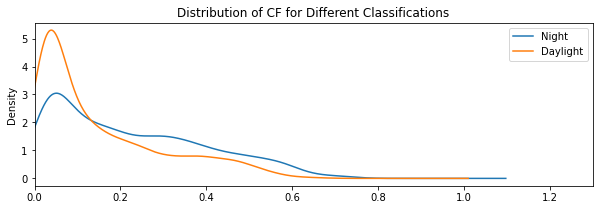

In [40]:
cols_to_vis = ['CF']
classifications_to_vis = ['Night', 'Daylight']

for col in cols_to_vis:
    plt.figure(figsize=(10, 3)) 
    for classification in classifications_to_vis:
        # Plot the density for the current classification group
        data[data['DAY_NIGHT'] == classification][col].plot(kind='density', label=classification)
    
    plt.xlim(0, 1.3)
    plt.legend()
    plt.title(f'Distribution of {col} for Different Classifications')
    plt.show()

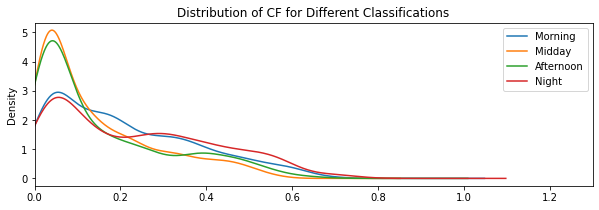

In [41]:
cols_to_vis = ['CF']
classifications_to_vis = ['Morning', 'Midday', 'Afternoon', 'Night']

for col in cols_to_vis:
    plt.figure(figsize=(10, 3)) 
    for classification in classifications_to_vis:
        # Plot the density for the current classification group
        data[data['DAY_PART'] == classification][col].plot(kind='density', label=classification)
    
    plt.xlim(0, 1.3)
    plt.legend()
    plt.title(f'Distribution of {col} for Different Classifications')
    plt.show()

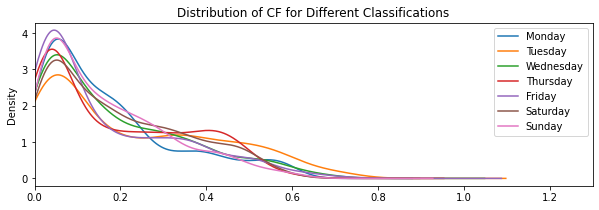

In [42]:
cols_to_vis = ['CF']
classifications_to_vis = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

for col in cols_to_vis:
    plt.figure(figsize=(10, 3)) 
    for classification in classifications_to_vis:
        # Plot the density for the current classification group
        data[data['day_of_week'] == classification][col].plot(kind='density', label=classification)
    
    plt.xlim(0, 1.3)
    plt.legend()
    plt.title(f'Distribution of {col} for Different Classifications')
    plt.show()

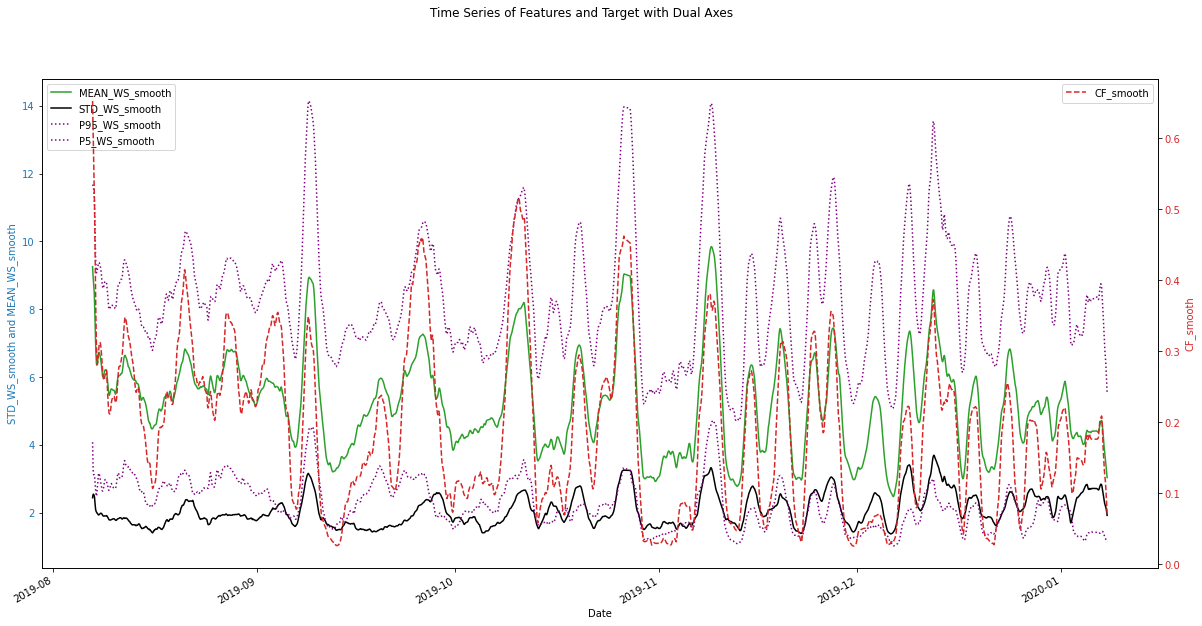

In [98]:
numerical_data['CF_smooth'] = numerical_data['CF'].rolling(window=48, min_periods=1).mean()
numerical_data['MEAN_WS_smooth'] = numerical_data['MEAN_WS'].rolling(window=48, min_periods=1).mean()
numerical_data['STD_WS_smooth'] = numerical_data['STD_WS'].rolling(window=48, min_periods=1).mean()
numerical_data['P95_WS_smooth'] = numerical_data['P95_WS'].rolling(window=48, min_periods=1).mean()
numerical_data['P5_WS_smooth'] = numerical_data['P5_WS'].rolling(window=48, min_periods=1).mean()

# Plot the data
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot STD_WS_smooth on ax1
numerical_data['MEAN_WS_smooth'].plot(ax=ax1,label='MEAN_WS_smooth', color='tab:green')
numerical_data['STD_WS_smooth'].plot(ax=ax1,label='STD_WS_smooth', color='black')
numerical_data['P95_WS_smooth'].plot(ax=ax1,label='P95_WS_smooth', color='purple', linestyle=':')
numerical_data['P5_WS_smooth'].plot(ax=ax1,label='P5_WS_smooth', color='purple', linestyle=':')

ax1.set_xlabel('Date')
ax1.set_ylabel('STD_WS_smooth and MEAN_WS_smooth', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()

# Plot CF on ax2
numerical_data['CF_smooth'].plot(ax=ax2,label='CF_smooth', color='tab:red', linestyle='--')
ax2.set_ylabel('CF_smooth', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and legend
fig.suptitle('Time Series of Features and Target with Dual Axes')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()

As we can see, MEAN_WS_smooth, P95_WS_smooth, P5_WS_smooth, and electricity output are strongly correlated.

The analysis reveals that:
- Wind speeds from previous time points influence the current wind speed.
- The current wind speed is strongly correlated with electricity output.

Thus, it can be concluded that wind speeds from past time points indirectly affect the current electricity output.

# Feature Engineering & Part of EDA

In [45]:
def get_data_final(data, correlation):
    ws_columns = [col for col in data.columns if col.startswith('WS_')]
    high_cor_list = correlation[correlation['WS_location'].isin(ws_columns)].iloc[:10]['WS_location'].to_list()
    data_final = data[high_cor_list].copy()
    
    data_final['MIN_WS'] = data[ws_columns].min(axis=1)
    data_final['MEDIAN_WS'] = data[ws_columns].median(axis=1)
    data_final['P5_WS'] = data[ws_columns].apply(lambda row: np.percentile(row, 5), axis=1)
    data_final['P25_WS'] = data[ws_columns].apply(lambda row: np.percentile(row, 25), axis=1)
    data_final['P75_WS'] = data[ws_columns].apply(lambda row: np.percentile(row, 75), axis=1)
    data_final['P95_WS'] = data[ws_columns].apply(lambda row: np.percentile(row, 95), axis=1)
    data_final['MAX_WS'] = data[ws_columns].max(axis=1)
    data_final['MEAN_WS'] = data[ws_columns].mean(axis=1)
    data_final['STD_WS'] = data[ws_columns].std(axis=1)

    data_final = pd.merge(data_final, data.select_dtypes(include='object'), left_index=True, right_index=True)
    data_final['CF'] = data['CF']
    cols = data_final.columns.tolist()
    new_order = [cols[-1]] + cols[:-1]
    data_final = data_final[new_order]

    return data_final

data_final = get_data_final(data, pearson_spearman)

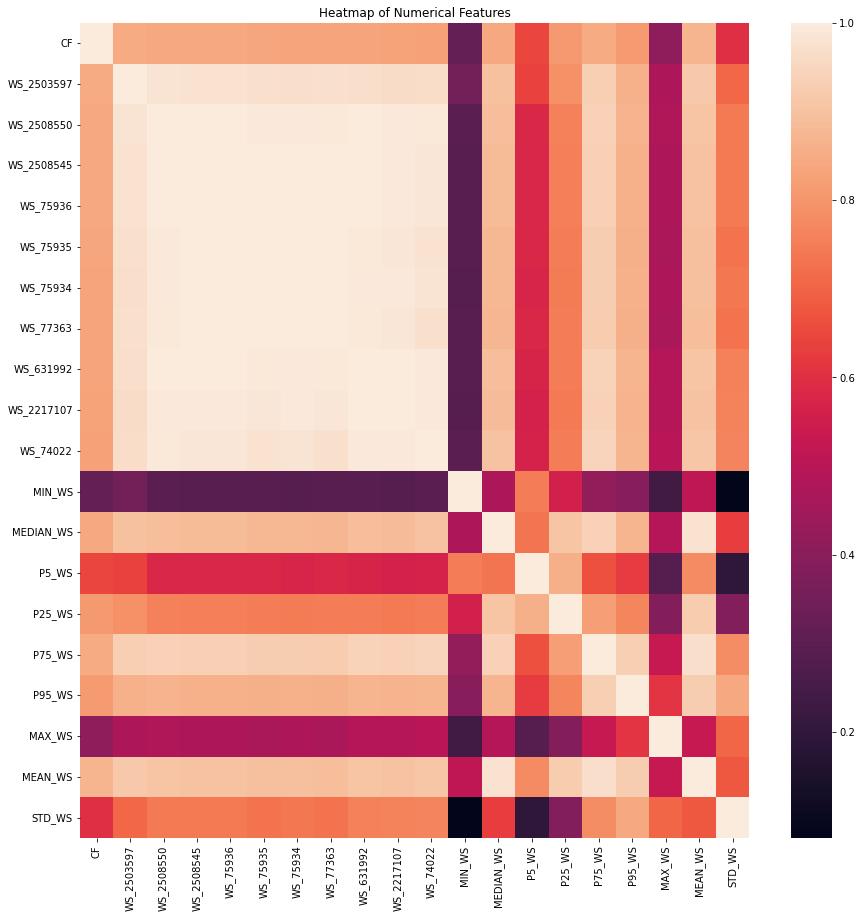

In [46]:
numerical_columns = data_final.select_dtypes(include=[np.number])
plt.figure(figsize=(15,15))
sns.heatmap(numerical_columns.corr())
plt.title('Heatmap of Numerical Features')
plt.show()

已经生成完feature

开始model

同时Linear Regression和Decision Tree（要画出图：可以看出feature importance）

现在feature engineering完成，
一共有：
XX个numerical feature，分别是。。。，选择的原因：。。。和Y关系很强，correlation大
XX个categorical，选择的原因：通过barplot、density plot和anova、t test，也判断出他们和Y的关系很强（high predictive power）

现在开始modeling：

1. baseline model（也为了做feature selection）—— multivariate analysis （实际上可以
2. 

## Multivariate Analysis

### Linear Regression - Feature Selection

In [47]:
# Extract categorical features
categorical_features = data.select_dtypes('object').columns

In [48]:
formula= 'CF' + ' ~ C(SEASON) + C(DAY_NIGHT) + C(DAY_PART) + C(IS_WEEKEND) + C(day_of_week) + WS_2503597 + WS_2508550 + WS_2508545 + WS_75936 + WS_75935 + WS_75934 + WS_77363 + WS_631992 + WS_2217107 + WS_74022 + MEAN_WS + MEDIAN_WS + STD_WS + MIN_WS + MAX_WS + P5_WS + P25_WS + P75_WS + P95_WS'
# 也是rfe
mod = smf.ols(formula, data=data)
res = mod.fit()
print(res.summary())
print('---------------------------------------------------------------------------------------------------')
print('\t')

                            OLS Regression Results                            
Dep. Variable:                     CF   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     569.9
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:45:05   Log-Likelihood:                 4566.4
No. Observations:                3635   AIC:                            -9071.
Df Residuals:                    3604   BIC:                            -8879.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

（可以提取前20correlation的location； 用min, 5th, 25th，median, 75th, 95th, max, mean, std来描述同一时刻所有风速（因为。。。），代替后面的location的风速）

Inter：

C(DAY_NIGHT)[T.Night]的pvalue是0.094>0.05，说明在ttest bivariate analysis中显著，在multivariate analysis中也显著

IS_WEEKEND在uni/bi/multi variate中都是对Y的影响没有明显差异。（只有test才能说不显著）所以这个feature没有predictive power，舍弃

day_of_week没有很高的predictive power。。。

可以看出min, 5th, 25th，median, 75th, 95th, max, mean, std都most likely显著

需要筛掉那些feature

### Decision Tree - Feature Selection

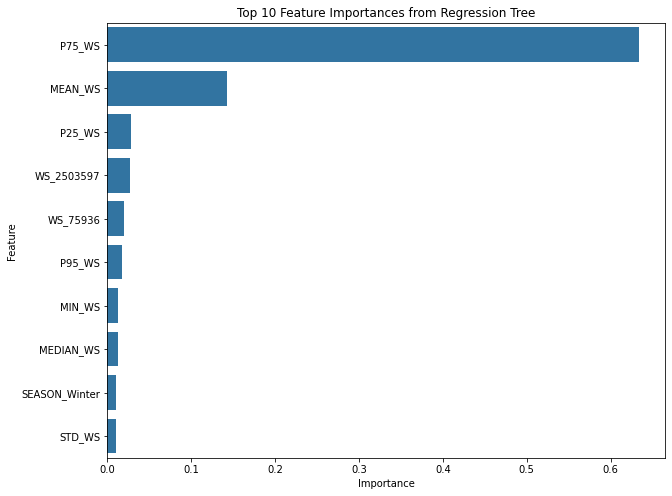

In [49]:
# Prepare Features and Target
X = data_final.drop(columns=['CF'])
y = data_final['CF']

# Identify categorical columns
categorical_columns = data_final.select_dtypes('object').columns.to_list()
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()

# Define the preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline that first transforms the data and then fits the regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Fit the model
pipeline.fit(X, y)

# Extract the trained regressor and the preprocessor
regressor = pipeline.named_steps['regressor']
preprocessor = pipeline.named_steps['preprocessor']

preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Get the feature names after one-hot encoding
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_feature_names = numerical_columns + encoded_feature_names.tolist()

# Get Feature Importances
importances = regressor.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# # Plot Feature Importances
# plt.figure(figsize=(10, 8))
# sns.barplot(x='Importance', y='Feature', data=feature_importances)
# plt.title('Feature Importances from Regression Tree')
# plt.show()

# Plot only the top N features
top_n = 10
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(top_n))
plt.title(f'Top {top_n} Feature Importances from Regression Tree')
plt.show()

常理上来看我们认为发电机会收到周围平均风速的影响更大，但通过feature importance来看，75 percentile这个location影响更大

In [50]:
# Visualize the regression tree with a larger output size
dot_data = export_graphviz(regressor, out_file=None, 
                           feature_names=all_feature_names, 
                           filled=True, rounded=True, 
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'  # or 'svg'
graph.render('regression_tree')
# display(Image(filename='regression_tree.png'))


# # Alternatively, to directly display in Jupyter notebook
# graph


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.132942 to fit


'regression_tree.png'

可以不保存这个图，但做了这一步，24个feature同样重要

# Stratified Split by DAY_NIGHT

In [51]:
# Ensure the DataFrame is sorted by date
data.sort_index(inplace=True)

# <sort这一步放在那里？>

In [52]:
# Define the split ratios
train_ratio = 0.8
test_ratio = 0.2

def stratified_train_test_split(data, feature, train_ratio, test_ratio):
    # Create empty DataFrames for train and test sets
    train_data = pd.DataFrame()
    test_data = pd.DataFrame()

    # Iterate over each unique value in the feature column
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        train_subset, test_subset = train_test_split(subset, test_size=test_ratio, random_state=42)
        
        train_data = pd.concat([train_data, train_subset])
        test_data = pd.concat([test_data, test_subset])

    return train_data.sort_index(), test_data.sort_index()

# Perform the stratified train-test split
train_data, test_data = stratified_train_test_split(data_final, 'DAY_NIGHT', train_ratio, test_ratio)

# Feature Scaling

In [53]:
# Used for mannualy model training and tuning
X_train, y_train = train_data.iloc[:,1:], train_data['CF']
X_test, y_test = test_data.iloc[:,1:], test_data['CF']


In [54]:
# Identify numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ])

# Fit the preprocessor on the training data and transform both the training and test data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Convert the scaled data back to DataFrame for easier use
numerical_features = preprocessor.named_transformers_['num'].named_steps['scaler'].get_feature_names_out(numerical_columns)
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_features = np.concatenate([numerical_features, categorical_features])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=all_features, index=X_test.index)


# Define the TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Autogluon

In [55]:
predictor = TabularPredictor(label='CF', 
                             problem_type= 'regression', 
                             eval_metric='mean_absolute_error', 
                             learner_kwargs={'ignored_columns': []}).fit(
                                                                           train_data = train_data,
                                                                           time_limit=300,presets="medium_quality_faster_train")

No path specified. Models will be saved in: "AutogluonModels/ag-20240619_234509"
Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.7
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:12:58 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       3.36 GB / 32.00 GB (10.5%)
Disk Space Avail:   216.81 GB / 926.35 GB (23.4%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20240619_234509"
Train Data Rows:    2907
Train Data Columns: 24
Label Column:       CF
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:

Fitting model: WeightedEnsemble_L2 ... Training model for up to 299.92s of the 168.11s of remaining time.
	Ensemble Weights: {'NeuralNetTorch': 0.867, 'XGBoost': 0.133}
	-0.027	 = Validation score   (-mean_absolute_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 131.95s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 30706.8 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240619_234509")


In [56]:
leaderboard_df = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.026961,mean_absolute_error,0.016283,28.056697,0.000421,0.044410,2,True,9
1,NeuralNetTorch,-0.027326,mean_absolute_error,0.008324,26.707668,0.008324,26.707668,1,True,8
2,CatBoost,-0.035181,mean_absolute_error,0.004003,97.415883,0.004003,97.415883,1,True,4
3,NeuralNetFastAI,-0.035304,mean_absolute_error,0.009232,2.331498,0.009232,2.331498,1,True,6
4,XGBoost,-0.036239,mean_absolute_error,0.007538,1.304619,0.007538,1.304619,1,True,7
5,ExtraTreesMSE,-0.039051,mean_absolute_error,0.038901,0.482159,0.038901,0.482159,1,True,5
6,KNeighborsDist,-0.040686,mean_absolute_error,0.009516,0.008395,0.009516,0.008395,1,True,2
7,RandomForestMSE,-0.041111,mean_absolute_error,0.042051,1.754619,0.042051,1.754619,1,True,3
8,KNeighborsUnif,-0.042330,mean_absolute_error,0.074849,1.052216,0.074849,1.052216,1,True,1


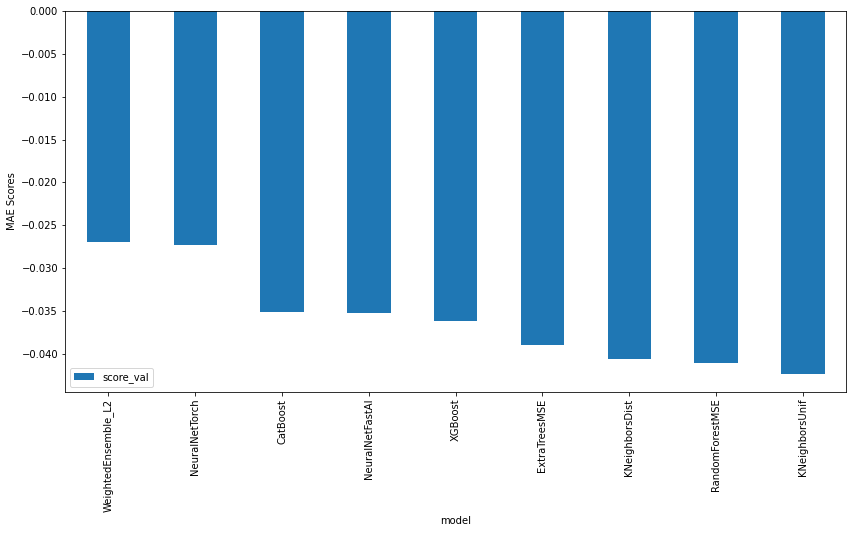

In [57]:
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("MAE Scores")
plt.show()

In [59]:
import autogluon.core as space
# from autogluon.core.searcher import Space
## From autogluon documentation
from autogluon.tabular import TabularPredictor, TabularDataset
import autogluon.common as ag


eval_metric = 'mean_absolute_error' 
label = 'CF'
ignored_columns = []   # Ignored columns while training
train_data = train_data                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 300                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"


nn_options = {'num_epochs': 5,
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True,
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']#查！！



hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }

num_trials = 20            # Number of hyperparameter optimization trials you want to perform 查！！
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler 查！！
hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='CF', problem_type='regression', eval_metric='mean_absolute_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train_data, 
                                                                         time_limit=time_limit,
                                                                         presets=presets,
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')

2024-06-19 18:51:36,131	INFO timeout.py:54 -- Reached timeout of 29.353133404254915 seconds. Stopping all trials.
2024-06-19 18:51:36,138	INFO tune.py:1016 -- Wrote the latest version of all result files and experiment state to '/Users/siqi/Desktop/Vistra Project/AutogluonModels/ag-20240619_234721/models/NeuralNetTorch_BAG_L2' in 0.0058s.
2024-06-19 18:51:37,275	WARNING experiment_analysis.py:190 -- Failed to fetch metrics for 4 trial(s):
- d2b1de12: FileNotFoundError('Could not fetch metrics for d2b1de12: both result.json and progress.csv were not found at /Users/siqi/Desktop/Vistra Project/AutogluonModels/ag-20240619_234721/models/NeuralNetTorch_BAG_L2/d2b1de12')
- 74a9c279: FileNotFoundError('Could not fetch metrics for 74a9c279: both result.json and progress.csv were not found at /Users/siqi/Desktop/Vistra Project/AutogluonModels/ag-20240619_234721/models/NeuralNetTorch_BAG_L2/74a9c279')
- 05adeb33: FileNotFoundError('Could not fetch metrics for 05adeb33: both result.json and progr

In [60]:
leaderboard_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-0.043280,mean_absolute_error,0.665009,33.172606,0.000427,0.028543,3,True,9
1,WeightedEnsemble_L2,-0.043648,mean_absolute_error,0.218883,11.104362,0.000578,0.029619,2,True,5
2,NeuralNetTorch_BAG_L2/05adeb33,-0.043998,mean_absolute_error,0.580119,28.117545,0.182502,5.916012,2,True,8
3,NeuralNetTorch_BAG_L2/d2b1de12,-0.044767,mean_absolute_error,0.482080,27.228050,0.084464,5.026518,2,True,6
4,NeuralNetTorch_BAG_L1/05f42301,-0.045309,mean_absolute_error,0.131230,5.857455,0.131230,5.857455,1,True,3
5,NeuralNetTorch_BAG_L1/ac048c21,-0.046663,mean_absolute_error,0.087075,5.217288,0.087075,5.217288,1,True,1
6,NeuralNetTorch_BAG_L1/e3f1eabd,-0.051340,mean_absolute_error,0.113255,5.864883,0.113255,5.864883,1,True,4
7,NeuralNetTorch_BAG_L2/74a9c279,-0.058591,mean_absolute_error,0.613483,30.281292,0.215866,8.079759,2,True,7
8,NeuralNetTorch_BAG_L1/d89c8930,-0.073845,mean_absolute_error,0.066056,5.261907,0.066056,5.261907,1,True,2
9,WeightedEnsemble_L3_FULL,NaN,mean_absolute_error,NaN,3.532047,NaN,0.028543,3,True,16


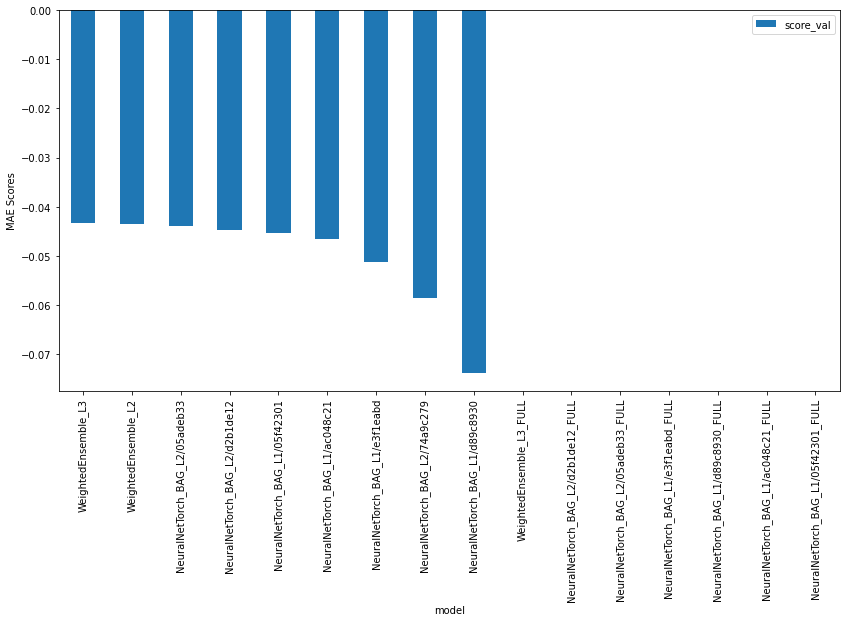

In [61]:
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("MAE Scores")
plt.show()

In [62]:
predictions = predictor_new_hpo.predict(test_data)
predictions.reset_index()

,DATETIME,CF
0,2019-08-08 17:00:00,0.270613
1,2019-08-09 03:00:00,0.249306
2,2019-08-09 11:00:00,0.041870
3,2019-08-09 12:00:00,0.041236
4,2019-08-09 14:00:00,0.091908
...,...,...
723,2020-01-07 06:00:00,0.032212
724,2020-01-07 07:00:00,0.034038
725,2020-01-07 09:00:00,0.033671
726,2020-01-07 11:00:00,0.022733


In [63]:
mean_absolute_error(test_data['CF'], predictions)

0.0446996418870286

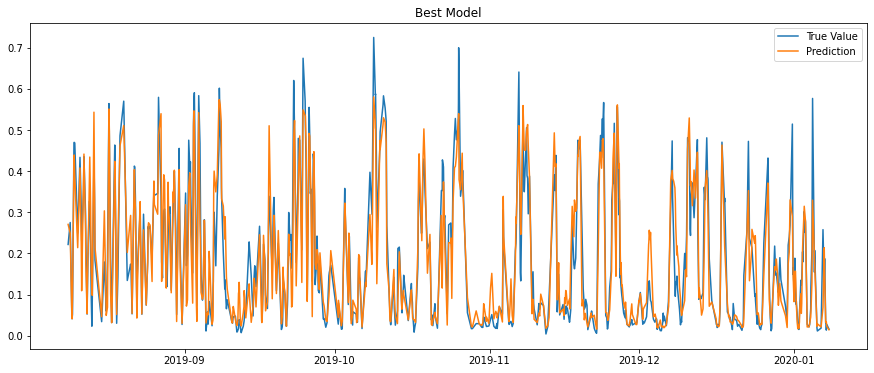

In [64]:
plt.figure(figsize=(15,6))
plt.title('Best Model')
plt.plot(test_data['CF'], label='True Value')
plt.plot(predictions, label='Prediction') 
plt.legend()
plt.show()

In [65]:
best_model = predictor.get_model_best()
print("Best model:", best_model)

Best model: WeightedEnsemble_L2


/var/folders/h7/ptlvdwt91wg0sbkhpsf6nrfm0000gn/T/ipykernel_25338/821251920.py:1: DeprecationWarning: `get_model_best` has been deprecated and will be removed in version 1.2. Please use `model_best` instead. This will raise an error in the future!
  best_model = predictor.get_model_best()


In [66]:
predictions_best_model = predictor.predict(test_data, model=best_model)

In [67]:
mean_absolute_error(test_data['CF'], predictions_best_model)

0.027808373662393894

In [68]:
feature_importance = predictor.feature_importance(train_data)
print(feature_importance)

Computing feature importance via permutation shuffling for 24 features using 2907 rows with 5 shuffle sets...
	7.91s	= Expected runtime (1.58s per shuffle set)
2024-06-19 18:51:44,747	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2024-06-19 18:51:44,749	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=26118, ip=127.0.0.1)
  File "/opt/anaconda3/lib/python3.9/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset, Sequence, register_logger
  File "/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py", line 247, in <module>
    _LIB = _load_lib()
  File "/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py", line 232, in _load_lib
    lib = ctypes.cdll.LoadLibrary(lib_path[0])
  File "/opt/anaconda3/lib/python3.9/ctyp

2024-06-19 18:51:44,773	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=26124, ip=127.0.0.1)
  File "/opt/anaconda3/lib/python3.9/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset, Sequence, register_logger
  File "/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py", line 247, in <module>
    _LIB = _load_lib()
  File "/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py", line 232, in _load_lib
    lib = ctypes.cdll.LoadLibrary(lib_path[0])
  File "/opt/anaconda3/lib/python3.9/ctypes/__init__.py", line 460, in LoadLibrary
    return self._dlltype(name)
  File "/opt/anaconda3/lib/python3.9/ctypes/__init__.py", line 382, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen(/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <C3EB28DD-60B

             importance    stddev       p_value  n  p99_high   p99_low
day_of_week    0.023285  0.000359  6.744456e-09  5  0.024023  0.022546
P25_WS         0.022767  0.000782  1.667116e-07  5  0.024377  0.021157
P95_WS         0.022508  0.000506  3.060463e-08  5  0.023549  0.021466
MEAN_WS        0.020207  0.000553  6.701594e-08  5  0.021345  0.019070
SEASON         0.018421  0.000562  1.038525e-07  5  0.019578  0.017263
WS_2508545     0.017716  0.000556  1.164505e-07  5  0.018861  0.016570
MEDIAN_WS      0.017043  0.000439  5.263939e-08  5  0.017946  0.016139
P75_WS         0.016972  0.000416  4.332434e-08  5  0.017829  0.016115
WS_631992      0.014048  0.000488  1.743212e-07  5  0.015053  0.013044
MAX_WS         0.013787  0.000529  2.596262e-07  5  0.014876  0.012698
STD_WS         0.013655  0.000530  2.716505e-07  5  0.014746  0.012564
DAY_PART       0.013644  0.000339  4.549175e-08  5  0.014341  0.012946
WS_2503597     0.012665  0.000264  2.247013e-08  5  0.013208  0.012123
WS_759

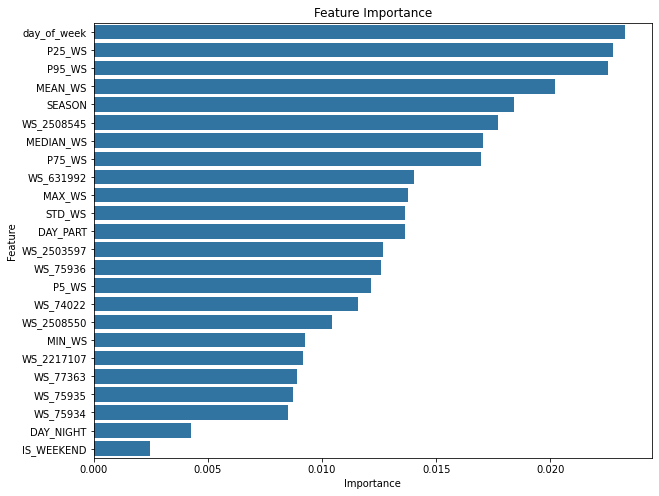

In [69]:
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance['importance'], y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [100]:
data['MEAN_WS'].shift(1).rolling(30, min_periods=1).mean()

DATETIME
2019-08-07 00:00:00         NaN
2019-08-07 01:00:00    9.254286
2019-08-07 02:00:00    9.086786
2019-08-07 03:00:00    8.954524
2019-08-07 04:00:00    8.856116
                         ...   
2020-01-07 19:00:00    3.356074
2020-01-07 20:00:00    3.352836
2020-01-07 21:00:00    3.333039
2020-01-07 22:00:00    3.307613
2020-01-07 23:00:00    3.262327
Name: MEAN_WS, Length: 3635, dtype: float64

# Strategy B

In [ ]:
data['MEAN_WS_ROLLING_AVG'] = data['MEAN_WS'].shift(1).rolling(30, min_periods=1).mean() # 选3的原因：认为前2个小时包括当前，可能会造成影响。最后也可以用sensitivity analysis选几
data['MEDIAN_WS_AVG'] = data['MEDIAN_WS'].shift(1).rolling(30, min_periods=1).mean()
data['STD_WS_AVG'] = data['STD_WS'].shift(1).rolling(30, min_periods=1).mean()
data['P5_WS_AVG'] = data['P5_WS_AVG'].shift(1).rolling(30, min_periods=1).mean()
data['P95_WS_AVG'] = data['STD_WS'].shift(1).rolling(30, min_periods=1).mean()

In [109]:
dataB = pd.DataFrame()
rolling_window = 1
dataB['MEAN_WS_ROLLING_AVG'] = data['MEAN_WS'].shift().rolling(rolling_window, min_periods=1).mean() # 选3的原因：认为前2个小时包括当前，可能会造成影响。最后也可以用sensitivity analysis选几
dataB['STD_WS_ROLLING_AVG'] = data['STD_WS'].shift().rolling(rolling_window, min_periods=1).mean()
dataB['P5_WS_ROLLING_AVG'] = data['P5_WS'].shift().rolling(rolling_window, min_periods=1).mean()
dataB['P95_WS_ROLLING_AVG'] = data['P95_WS'].shift().rolling(rolling_window, min_periods=1).mean()
dataB['CF'] = data['CF']
dataB = dataB.dropna().reset_index().drop('DATETIME',axis=1)
dataB

,MEAN_WS_ROLLING_AVG,STD_WS_ROLLING_AVG,P5_WS_ROLLING_AVG,P95_WS_ROLLING_AVG,CF
0,9.254286,2.437052,4.0750,11.6790,0.605852
1,8.919286,2.564288,3.1000,11.6590,0.564094
2,8.690000,2.583354,2.6310,11.5625,0.532721
3,8.560893,2.585717,2.7930,11.5725,0.495608
4,8.165714,2.487341,2.9725,11.0715,0.384439
...,...,...,...,...,...
3629,2.037500,1.284776,0.8500,3.4040,0.004494
3630,1.923393,1.208378,1.0300,3.0835,0.006143
3631,1.789732,1.197688,0.8665,3.0785,0.008399
3632,1.802768,1.175470,0.9920,2.9185,0.015788


In [111]:
test_split=round(len(dataB)*0.20)
test_split

727

In [112]:
df_for_training=dataB[:-test_split]
df_for_testing=dataB[-test_split:]
print(df_for_training.shape)
print(df_for_testing.shape)

(2907, 5)
(727, 5)


In [ ]:
# To make the package version consistant if I have more time, it's better to use container
# !pip install keras==2.12.0
# !pip install tensorflow==2.10.1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler